<a href="https://colab.research.google.com/github/Sayantan108/MedImgTask/blob/main/medimg_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# **Medical Imaging Assignment**

</center>

<br>
<br>

# **Problem**

*Generate a dataset of 400 2-dimensional data vectors which consists of four groups
of 100 data vectors. The four groups are modeled by Gaussian distributions with
means $m _{1}=\begin{pmatrix}0&0\end{pmatrix}^{T}$ , $m _{2}=\begin{pmatrix}4&0\end{pmatrix}^{T}$ , $m _{3}=\begin{pmatrix}0&4\end{pmatrix}^{T}$ , $m _{4}=\begin{pmatrix}5&4\end{pmatrix}^{T}$ , respectively, and covariance matrices $S _{1} = I$ , $S_{2}=\begin{pmatrix}1&0.2\\0.2&1.5\end{pmatrix}$ , $S_{3}=\begin{pmatrix}1&0.4\\0.4&1.1\end{pmatrix}$ , $S_{4}=\begin{pmatrix}0.3&0.2\\0.2&0.5\end{pmatrix}$ , respectively.Plot the data vectors. Measure the Euclidean distance between any two data points and determine maximum* ($d_{max}$) *and minimum* ($d_{min}$) *Euclidean distances.*

<br><br>

### **Necessary imports**

In [ ]:
import numpy as np                           #for linear algebra opertaions
import matplotlib.pyplot as plt              #for plotting
from mpl_toolkits.mplot3d import Axes3D      #for 3-D plotting
from scipy.spatial.distance import cdist     #for distance finding
from scipy.stats import multivariate_normal  #for finding pdf


### **Creation of Dataset**

We will be creating 4 datasets, each comprising of 100 2-dimensional data vectors.

In [ ]:
#list of means
means = [[0,0], [4,0], [0,4], [5,4]]

#list of covariances
covs = [[[1,0],[0,1]], 
        [[1,0.2],[0.2,1.5]], 
        [[1,0.4],[0.4,1.1]], 
        [[0.3,0.2],[0.2,0.5]]]

datasets = []

#to generate the 400 vectors
np.random.seed(132)
for i in range(len(means)):
  vectors = np.random.multivariate_normal(mean=means[i],cov=covs[i],size=100)
  datasets.append(vectors)

### **Plotting of Data vectors**

Now, we will be plotting all the data vectors.

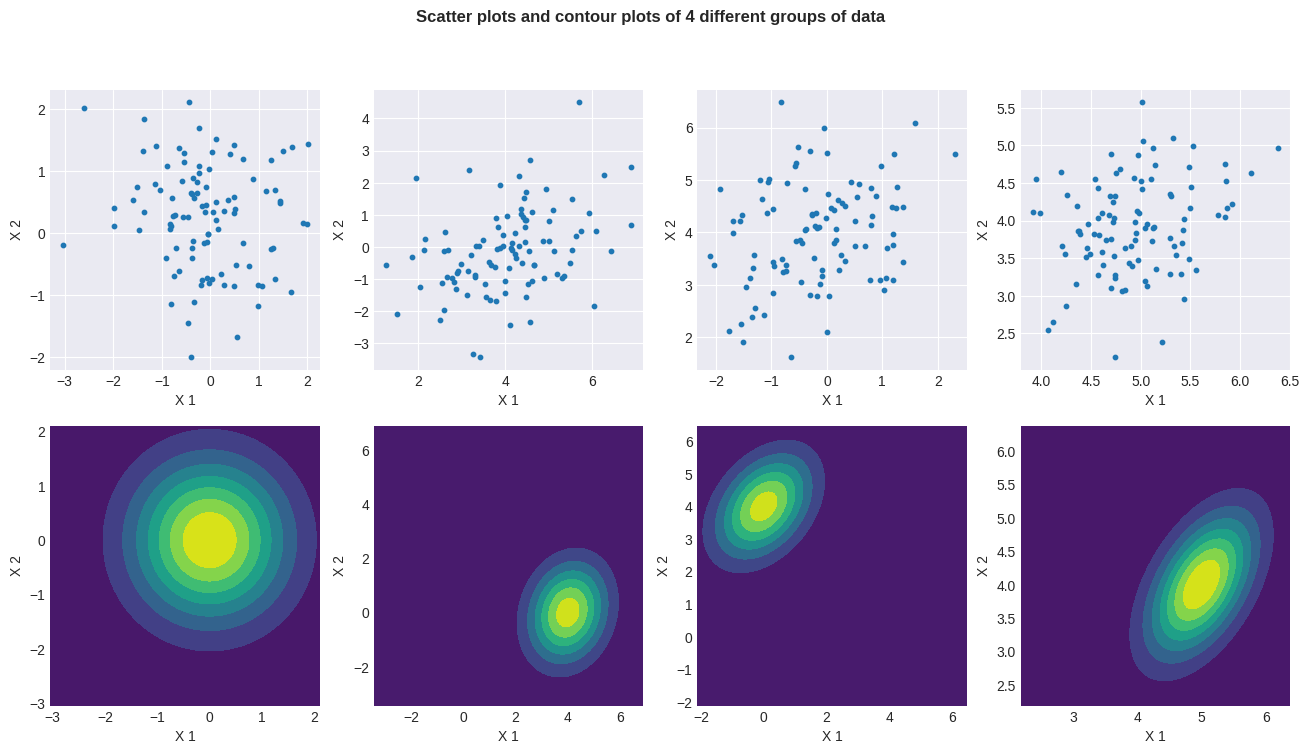

In [241]:
fig2d, ax2D = plt.subplots(figsize=(16,8))
axes = list()

fig2d.suptitle('Scatter plots and contour plots of 4 different groups of data',fontweight ="bold")

#for plotting individual groups of points
axes.append(plt.subplot2grid(shape=(2,4), loc=(0,0), colspan=1))
axes.append(plt.subplot2grid(shape=(2,4), loc=(0,1), colspan=1))
axes.append(plt.subplot2grid(shape=(2,4), loc=(0,2), colspan=1))
axes.append(plt.subplot2grid(shape=(2,4), loc=(0,3), colspan=1))

#for plotting individual groups of contours
axes.append(plt.subplot2grid(shape=(2,4), loc=(1,0), colspan=1))
axes.append(plt.subplot2grid(shape=(2,4), loc=(1,1), colspan=1))
axes.append(plt.subplot2grid(shape=(2,4), loc=(1,2), colspan=1))
axes.append(plt.subplot2grid(shape=(2,4), loc=(1,3), colspan=1))

# fig2d.colorbar(tcf)
plt.style.use('seaborn-darkgrid')

density=np.array([])

for index,dataset in enumerate(datasets):
  x,y=dataset.T
  LOW = np.min(np.array([np.min(x),np.min(y)]))
  HIGH = np.max(np.array([np.max(x),np.max(y)]))
  xx,yy = np.linspace(LOW,HIGH,100)[np.newaxis,...].repeat(2,0)
  
  xx,yy = np.meshgrid(xx,yy)
  gridspace = np.array([xx,yy]).transpose((1,2,0)).reshape(-1,2)
  
  z = multivariate_normal.pdf(gridspace, mean=means[index], cov=covs[index]).reshape(100,100)

  density = np.append(density,z)

  cs = axes[index+4].contourf(xx, yy, z, cmap='viridis')
  axes[index+4].set_xlabel('X 1')
  axes[index+4].set_ylabel('X 2')

  axes[index].set_xlabel('X 1')
  axes[index].set_ylabel('X 2')
  axes[index].scatter(*dataset.T, marker='o', s=10)

plt.show()

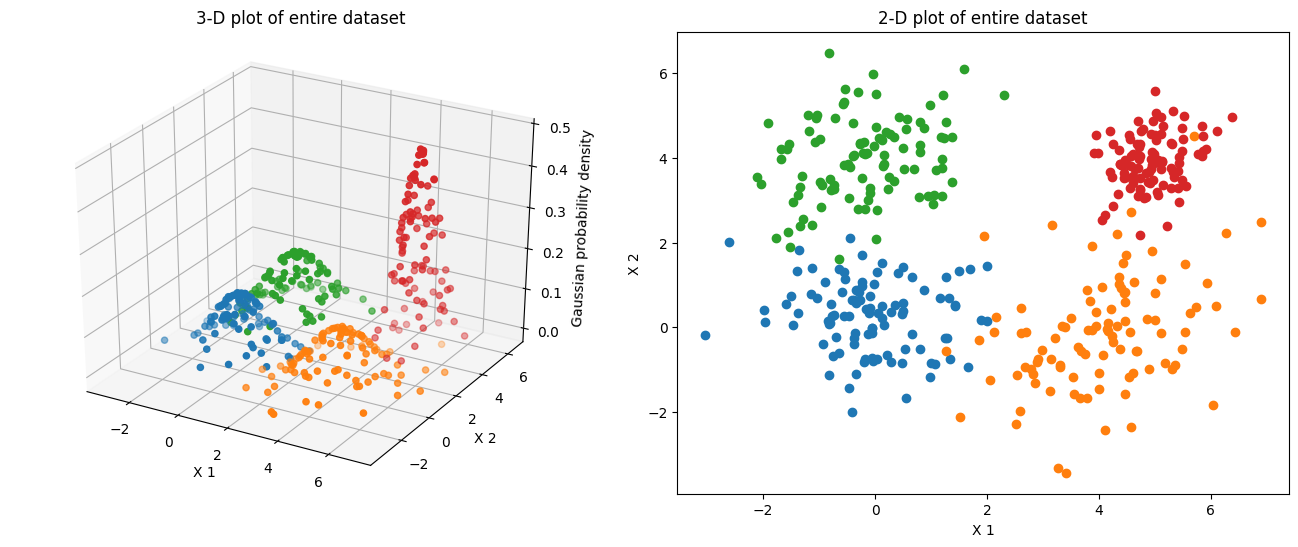

In [245]:

fig3d = plt.figure(figsize=(16.5,6))
axis3d = list()

axis3d.append(fig3d.add_subplot(1,2,1,projection='3d'))
axis3d.append(plt.subplot2grid(shape=(2,4), loc=(0,2), rowspan=8, colspan=2))

plt.style.use('default')
axis3d[0].title.set_text('3-D plot of entire dataset')
axis3d[0].set_xlabel('X 1')
axis3d[0].set_ylabel('X 2')
axis3d[0].set_zlabel('Gaussian probability density')
for index,dataset in enumerate(datasets):
  x,y = dataset.T
  z = multivariate_normal.pdf(dataset, mean=means[index], cov=covs[index])
  axis3d[0].scatter(x, y, z, marker='o')
  axis3d[1].scatter(x,y)

axis3d[1].title.set_text('2-D plot of entire dataset')
axis3d[1].set_xlabel('X 1')
axis3d[1].set_ylabel('X 2')
plt.show()

### **Finding minimum and maximum euclidean distances**

To find the minimum, and maximum euclidean distances, we use scipy to create a distance matrix and then use numpy method to find the maximum element in the matrix. For the minimum element, we have to locate the second smallest element in the matrix as it would also contain 0, because of the distance between a point and itself. After finding the smallest and largest value, we can also get the required points from our dataset whihc would give those values.

In [ ]:
def min_max_euclid(dataset):
  distances = cdist(dataset,dataset,metric='euclidean')
  minvals=[]
  for row in distances:
    #to get the second smallest element in 1st index
    minvals.append(np.partition(row,1)[1])

  valuemax = np.amax(distances)
  valuemin = np.ndarray.min(np.array(minvals))
  return (valuemax, np.where(distances == valuemax)[0], valuemin, np.where(distances == valuemin)[0])

#combining all 4 groups into a single dataset
data = datasets[3]
for i in range(3):
  data = np.concatenate((data,datasets[i]),axis=0)

maximum, maxindices, minimum, minindices = min_max_euclid(data)

print(f"Minimum : {min}")
print(f"Maximum : {max}")

Minimum : 0.004383962458604287
Maximum : 10.792448677955804


### **Plotting minimum and maximum distances**



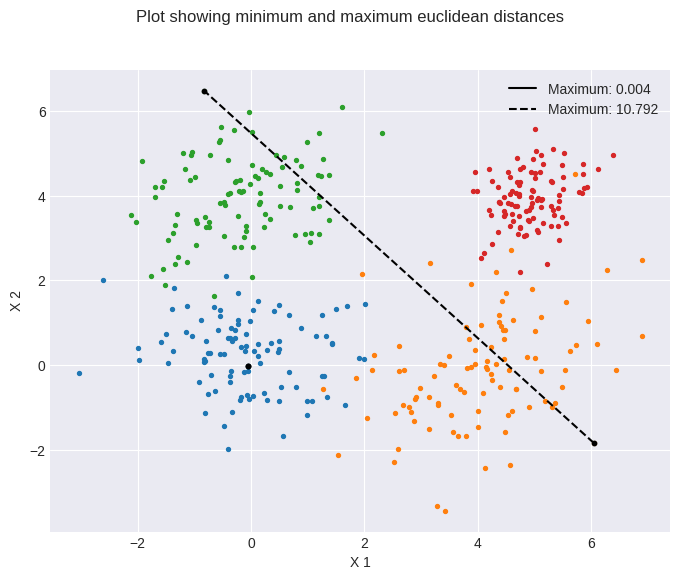

In [247]:
fig,ax = plt.subplots(figsize=(8,6))

fig.suptitle('Plot showing minimum and maximum euclidean distances')

plt.style.use('seaborn-darkgrid')

ax.set_xlabel('X 1')
ax.set_ylabel('X 2')

for dataset in datasets:
  x,y=dataset.T
  ax.scatter(x, y, marker='o', s=8)

ax.scatter(*data[minindices[0]], s=10, color='black')
ax.scatter(*data[minindices[1]], s=10, color='black')
ax.scatter(*data[maxindices[0]], s=10, color='black')
ax.scatter(*data[maxindices[1]], s=10, color='black')

ax.plot([data[minindices[0]][0], data[minindices[1]][0]], [data[minindices[0]][1], data[minindices[1]][1]], c='black', linestyle="solid", label="Maximum: {:.3f}".format(minimum))
ax.plot([data[maxindices[0]][0], data[maxindices[1]][0]], [data[maxindices[0]][1], data[maxindices[1]][1]], c='black', linestyle="dashed", label="Maximum: {:.3f}".format(maximum))

ax.legend()

plt.show()